# The Sparks Foundation - Data Science & Business Analytics
##### Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
##### Dataset : https://bit.ly/3kXTdox
##### Author : Nidhi Pandya 

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Importing data

In [2]:
data = pd.read_csv("/Users/np/Downloads/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploring data

In [3]:
data.shape

(150, 6)

In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data = data.drop(["Id"], axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Either of the two methods to find NULL values

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Remove duplicate rows if any

In [7]:
data.duplicated().sum()

3

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(147, 5)

## Check for outliers

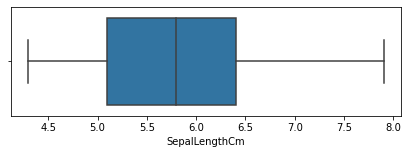

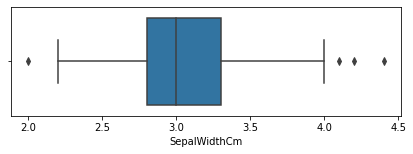

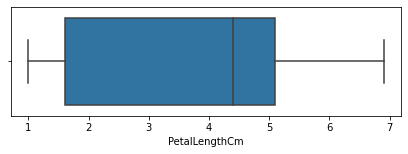

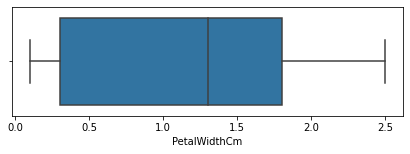

In [10]:
for i in data.columns:
    if data[i].dtype == 'float64':
        plt.figure(figsize = (7,2))
        sns.boxplot(data[i])

## Treating the outliers in SepalWidthCm column

In [11]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### https://youtu.be/A3gClkblXK8 Refer this for IQR method

In [12]:
# IQR method


Q1 = data.SepalWidthCm.quantile(0.25)
Q3 = data.SepalWidthCm.quantile(0.75)
Q1, Q3

## OTHER METHOD: 
#  Q1,Q2 = np.percentile(data["SepalWidthCm"], [25,75])

(2.8, 3.3)

In [13]:
IQR = Q3 - Q1
IQR

0.5

In [14]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(2.05, 4.05)

In [15]:
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_limit if x>upper_limit 
                                                  else lower_limit if x<lower_limit 
                                                  else x)

<AxesSubplot:xlabel='SepalWidthCm'>

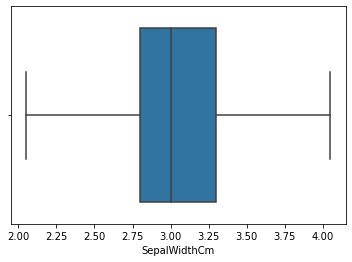

In [16]:
sns.boxplot(data["SepalWidthCm"])

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


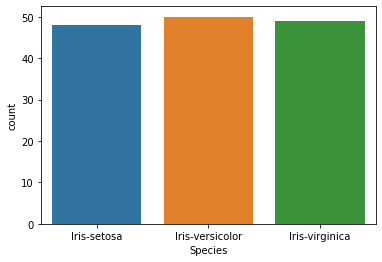

In [17]:
print(data.Species.value_counts())
sns.countplot(data.Species)
plt.show()

In [18]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

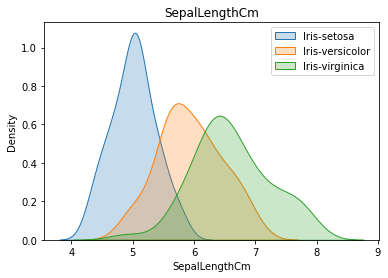

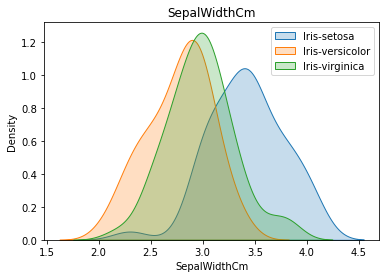

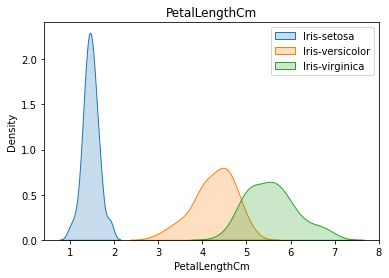

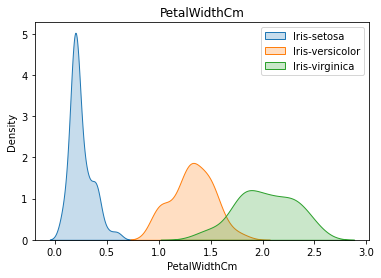

In [19]:
# Distributions of features by Species

for i in data.columns[:-1]:
    
    
        sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label ="Iris-setosa", shade=True)

        sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label = "Iris-versicolor", shade=True)

        sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label = "Iris-virginica", shade=True)

        plt.title(i)
        
        plt.legend()

        plt.show()

- From the graphs we see, Iris-setosa is easily distinguishable through its petal length and petal width. 

## Finding optimal no. of KMeans clusters

- Find KMeans cluster using Elbow method

- https://www.youtube.com/watch?v=FqIGui0rwh4&t=336s refer this

In [20]:
# All rows of 4 columns
x = data.iloc[:,:4].values

In [21]:
wcss = []

for i in range(1,8):
    kmeans = KMeans(i).fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [22]:
## WCSS = Within-Cluster Sum of Squares
wcss

[662.5493197278907,
 150.78429381127447,
 77.01300425115039,
 55.74678285256411,
 44.92439484649123,
 37.74708251183517,
 33.376441162323516]

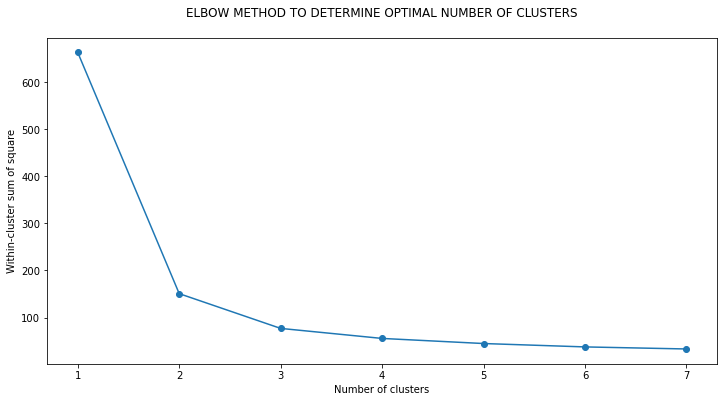

In [23]:
no_of_clusters = range(1,8)
plt.figure(figsize = (12,6))
plt.plot(no_of_clusters, wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.title("ELBOW METHOD TO DETERMINE OPTIMAL NUMBER OF CLUSTERS\n");
plt.show()

- From the graph, we observe that there are steap slopes only until 3.
    * So, **optimal number of clusters = 3**.

In [24]:
kmeans = KMeans(n_clusters = 3)
y = kmeans.fit_predict(x)

In [25]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [26]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [27]:
data["Cluster"] = kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


- Cluster consists of data which is predicted  

In [28]:
data["Cluster"].value_counts(), data["Species"].value_counts()

(2    61
 1    48
 0    38
 Name: Cluster, dtype: int64,
 Iris-versicolor    50
 Iris-virginica     49
 Iris-setosa        48
 Name: Species, dtype: int64)

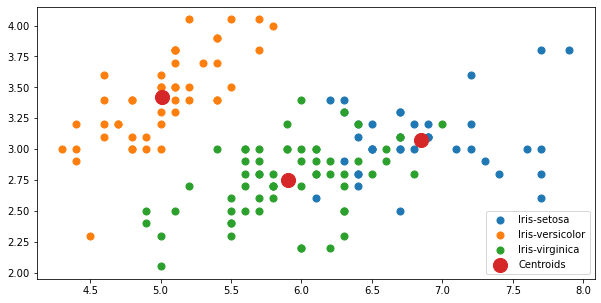

In [29]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(10,5))
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 50, label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 50, label = 'Iris-versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, label = 'Centroids')

plt.legend()
plt.show()

In [30]:
data.loc[data['Species']=='Iris-setosa']['Cluster'].value_counts() 

## the model has identified iris-setosa with 100% accuracy

1    48
Name: Cluster, dtype: int64

In [31]:
data.loc[data['Species']=='Iris-versicolor']['Cluster'].value_counts()

## 48 predicted correctly
## 2 predicted as Iris-virginica

2    48
0     2
Name: Cluster, dtype: int64

In [32]:
data.loc[data['Species']=='Iris-virginica']['Cluster'].value_counts()

## 36 predicted properly
## 13 predicted as Iris-versicolor

0    36
2    13
Name: Cluster, dtype: int64

In [38]:
data["Species_encoded"] = data["Species"].apply(lambda x:
                                                1 if x=="Iris-setosa" 
                                                else 0 if x=="Iris-virginica"
                                                else 2)

In [39]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0


In [40]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['Cluster']))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        49
           1       1.00      1.00      1.00        48
           2       0.79      0.96      0.86        50

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy is',accuracy_score(data['Species_encoded'],data['Cluster']))

Accuracy is 0.8979591836734694


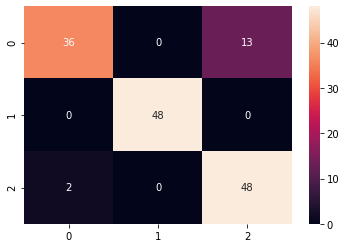

In [42]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['Cluster']), annot=True);

## TASK 2 COMPLETED!